In [1]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sb
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
%matplotlib inline

In [2]:
import os
os.getcwd()

'/Users/naoki/Desktop/DIC/Sprint/Sprint2'

#### 【問題1】train_test_splitのスクラッチ
まずはスクラッチの練習として、scikit-learnのtrain_test_splitを自作してみましょう。Jupyter Notebookでコーディングを進め、完成後はpyファイルとします。utilsディレクトリの中にsplit.pyを作ってください。

In [3]:
import sys
sys.path.append("/Users/naoki/Desktop/DIC/Sprint/utils/")

In [4]:
import numpy as np 
from utils.split import train_test_split

x = np.array([i for i in range(12)]).reshape(6,2)
y = np.array([i for i in range(10, 16)])
y = y.reshape(len(y), 1)

print("x input")
print(x)
print("y input")
print(y)
x_train, x_test, y_train, y_test = train_test_split(x, y, 0.5)
print("x train")
print(x_train)
print("x test")
print(x_test)
print("y train")
print(y_train)
print("y test")
print(y_test)

x input
[[ 0  1]
 [ 2  3]
 [ 4  5]
 [ 6  7]
 [ 8  9]
 [10 11]]
y input
[[10]
 [11]
 [12]
 [13]
 [14]
 [15]]
x train
[[4 5]
 [8 9]
 [0 1]]
x test
[[ 6  7]
 [10 11]
 [ 2  3]]
y train
[12 14 10]
y test
[13 15 11]


#### 【問題2】 分類パイプラインの作成
分類は3種類の手法を扱います。pyファイルで実行できる分類のパイプラインを作成してください。  
ロジスティック回帰  
SVM  
決定木  

データセットは3種類用意します。3つのデータセットが引数により切り替えられるようにしてください。
1つ目は事前学習期間同様にirisデータセットです。
sklearn.datasets.load_iris — scikit-learn 0.20.2 documentation
2値分類としたいため、以下の2つの目的変数のみ利用します。特徴量は4種類全て使います。
virgicolorとvirginica
また、残り2つは可視化が可能な特徴量が2つのデータセットを人工的に用意します。以下のコードで説明変数X,目的変数yが作成可能です。「シンプルデータセット1」「シンプルデータセット2」とします。

In [5]:
import numpy as np 
from utils.sprint2_pipeline import pipeline_classifier

In [6]:
from sklearn.datasets import load_iris

In [7]:
iris_data_set = load_iris()
X = pd.DataFrame(iris_data_set.data, columns=iris_data_set.feature_names)    #Put explanatory variable into x as pandasdata frame
Y = pd.DataFrame(iris_data_set.target, columns=['Species'])    #Put iris response variable into y as pandasdata frame
df = pd.concat([X, Y], axis=1)

#### Irisデータに対して予想を行う

Split data train & test
元データ数：150　学習データ数：112　検証データ数：38
Normalize feature data
Result Format = proba
AUC=0.29487


/Users/naoki/.pyenv/versions/anaconda3-4.3.0/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


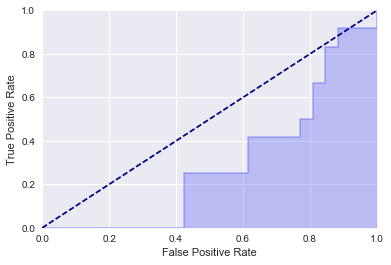

Result(Pridiction)=
[[8.09539110e-03 8.12512614e-01 1.79391995e-01]
 [9.42048049e-01 5.79493270e-02 2.62381431e-06]
 [4.92726060e-08 3.25910208e-03 9.96740849e-01]
 [9.01520595e-03 6.72485955e-01 3.18498839e-01]
 [1.40793413e-03 6.56716658e-01 3.41875408e-01]
 [8.85660549e-01 1.14330228e-01 9.22342129e-06]
 [6.11123447e-02 8.78609886e-01 6.02777690e-02]
 [7.25758710e-05 5.67116917e-02 9.43215732e-01]
 [4.78215309e-04 4.91981867e-01 5.07539918e-01]
 [2.05566822e-02 9.01251469e-01 7.81918488e-02]
 [8.68149329e-04 1.70504538e-01 8.28627312e-01]
 [9.02819561e-01 9.71768841e-02 3.55448081e-06]
 [9.30644678e-01 6.93535324e-02 1.78986551e-06]
 [9.08983562e-01 9.10130577e-02 3.38072220e-06]
 [9.81830509e-01 1.81688423e-02 6.48776236e-07]
 [1.39239730e-02 6.29294528e-01 3.56781499e-01]
 [3.55358039e-05 2.95560922e-02 9.70408372e-01]
 [1.73691874e-02 9.13998989e-01 6.86318236e-02]
 [1.62998406e-02 7.85726827e-01 1.97973332e-01]
 [2.67455637e-05 3.05897662e-02 9.69383488e-01]
 [9.41318601e-01 5.8

In [11]:
#ロジスティック回帰
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=30, solver='lbfgs', multi_class='multinomial')

#pipelineパラメーター
params_ext = {
         "normalization_on": True,
          "roc_plot_on": True,
          "cv_on": False,
          "cv_split": 5,
          "cv_random_state" : None,
          "cv_shuffle" : True,
          "grid_search_on" : False,
          "grid_search_samples" : 100,
          "result_format" : "predict_as_probability"
        }
#Grid search
param_grid = {
            "hyper_param":{
                'C' : [0.001, 0.01, 0.1, 1, 10, 100],
                'tol' : [1e-3, 1e-4, 1e-5]
            },
            "grid_search_param":{
                    "grid_search_cv":2
            }
        }

selected_feature_name = X.columns.values

result, answer, fpr, tpr, auc = pipeline_classifier(
                                    clf, X.values, Y.values, "Species", selected_feature_name, 2, 
                                    params=params_ext, 
                                    params_grid=param_grid)


print("Result(Pridiction)=")
print(result)
print("Answer=")
print(answer)

In [14]:
#SVM
from sklearn.svm import SVC
clf = SVC()

#pipelineパラメーター
params_ext = {
         "normalization_on": True,
          "roc_plot_on": False,
          "cv_on": False,
          "cv_split": 5,
          "cv_random_state" : None,
          "cv_shuffle" : True,
          "grid_search_on" : True,
          "grid_search_samples" : 100,
          "result_format" : "predict_as_binary"
        }
#Grid search
param_grid = {
            "hyper_param":{
                'C' : [0.001, 0.01, 0.1, 1, 10, 100],
                'tol' : [1e-3, 1e-4, 1e-5]
            },
            "grid_search_param":{
                    "grid_search_cv":2
            }
        }

selected_feature_name = X.columns.values

result, answer, fpr, tpr, auc = pipeline_classifier(
                                    clf, X.values, Y.values, "Species", selected_feature_name, 2, 
                                    params=params_ext, 
                                    params_grid=param_grid)

print("Result(Pridiction)=")
print(result)
print("Answer=")
print(answer)

Split data train & test
元データ数：150　学習データ数：112　検証データ数：38
Set best params  {'C': 10, 'tol': 0.001}
Normalize feature data
Result Format = binary
Result(Pridiction)=
[1 0 2 1 1 0 1 2 2 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]
Answer=
[[1]
 [0]
 [2]
 [1]
 [1]
 [0]
 [1]
 [2]
 [1]
 [1]
 [2]
 [0]
 [0]
 [0]
 [0]
 [1]
 [2]
 [1]
 [1]
 [2]
 [0]
 [2]
 [0]
 [2]
 [2]
 [2]
 [2]
 [2]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [2]
 [1]
 [0]]


/Users/naoki/.pyenv/versions/anaconda3-4.3.0/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/naoki/.pyenv/versions/anaconda3-4.3.0/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/naoki/.pyenv/versions/anaconda3-4.3.0/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", Futu

In [15]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth=10)

#pipelineパラメーター
params_ext = {
         "normalization_on": True,
          "roc_plot_on": False,
          "cv_on": False,
          "cv_split": 5,
          "cv_random_state" : None,
          "cv_shuffle" : True,
          "grid_search_on" : False,
          "grid_search_samples" : 100,
          "result_format" : "predict_as_binary"
        }
#Grid search
param_grid = {
            "hyper_param":{
                'max_depth' : [3, 10, 20],
            },
            "grid_search_param":{
                    "grid_search_cv":2
            }
        }

selected_feature_name = X.columns.values

result, answer, fpr, tpr, auc = pipeline_classifier(
                                    clf, X.values, Y.values, "Species", selected_feature_name, 2, 
                                    params=params_ext, 
                                    params_grid=param_grid)

print("Result(Pridiction)=")
print(result)
print("Answer=")
print(answer)

Split data train & test
元データ数：150　学習データ数：112　検証データ数：38
Normalize feature data
Result Format = binary
Result(Pridiction)=
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]
Answer=
[[1]
 [0]
 [2]
 [1]
 [1]
 [0]
 [1]
 [2]
 [1]
 [1]
 [2]
 [0]
 [0]
 [0]
 [0]
 [1]
 [2]
 [1]
 [1]
 [2]
 [0]
 [2]
 [0]
 [2]
 [2]
 [2]
 [2]
 [2]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [2]
 [1]
 [0]]


#### シンプルデータセット1作成コード

In [17]:
import numpy as np

np.random.seed(seed=0)
n_samples = 500
f0= [-1, 2]
f1 = [2, -1]
cov = [[1.0,0.8], [0.8, 1.0]]

f0 = np.random.multivariate_normal(f0, cov, int(n_samples/2))
f1 = np.random.multivariate_normal(f1, cov, int(n_samples/2))

X = np.concatenate((f0, f1))
y = np.concatenate((np.ones((int(n_samples/2))), np.ones((int(n_samples/2))) *(-1))).astype(np.int)

random_index = np.random.permutation(np.arange(n_samples))
X = X[random_index]
Y = y[random_index]

In [18]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth=10)

#pipelineパラメーター
params_ext = {
         "normalization_on": True,
          "roc_plot_on": False,
          "cv_on": False,
          "cv_split": 5,
          "cv_random_state" : None,
          "cv_shuffle" : True,
          "grid_search_on" : False,
          "grid_search_samples" : 100,
          "result_format" : "predict_as_binary"
        }
#Grid search
param_grid = {
            "hyper_param":{
                'max_depth' : [3, 10, 20],
            },
            "grid_search_param":{
                    "grid_search_cv":2
            }
        }

selected_feature_name = ["A", "B"]
result, answer, fpr, tpr, auc = pipeline_classifier(
                                    clf, X, Y, "TARGET", selected_feature_name, 2, 
                                    params=params_ext, 
                                    params_grid=param_grid)

print("Result(Pridiction)=")
print(result)
print("Answer=")
print(answer)

Split data train & test
元データ数：500　学習データ数：375　検証データ数：125
Normalize feature data
Result Format = binary
Result(Pridiction)=
[-1  1  1  1  1  1 -1  1 -1 -1 -1  1 -1  1 -1  1 -1  1  1 -1  1  1 -1 -1
 -1 -1  1  1 -1 -1  1  1  1  1  1 -1  1 -1 -1  1  1 -1 -1 -1 -1 -1 -1  1
  1 -1 -1 -1  1 -1 -1 -1  1 -1 -1  1 -1 -1  1 -1  1 -1 -1  1  1 -1  1  1
 -1 -1 -1  1 -1 -1  1  1  1  1  1 -1  1 -1 -1  1  1  1 -1 -1 -1 -1 -1  1
 -1  1  1  1 -1 -1  1 -1  1  1  1 -1  1  1  1 -1  1 -1 -1  1 -1 -1  1 -1
 -1 -1  1  1 -1]
Answer=
[-1  1  1  1  1  1 -1  1 -1 -1 -1  1 -1  1 -1  1 -1  1  1 -1  1  1 -1 -1
 -1 -1  1  1 -1 -1  1  1  1  1  1 -1  1 -1 -1  1  1 -1 -1 -1 -1 -1 -1  1
  1 -1 -1 -1  1 -1 -1 -1  1 -1 -1  1 -1 -1  1 -1  1 -1 -1  1  1 -1  1  1
 -1 -1 -1  1 -1 -1  1  1  1  1  1 -1  1 -1 -1  1  1  1 -1 -1 -1 -1 -1  1
 -1  1  1  1 -1 -1  1 -1  1  1  1 -1  1  1  1 -1  1 -1 -1  1 -1 -1  1 -1
 -1 -1  1  1 -1]


#### シンプルデータセット2作成コード

In [19]:
X = np.array([[-0.44699 , -2.8073  ],[-1.4621  , -2.4586  ],
       [ 0.10645 ,  1.9242  ],[-3.5944  , -4.0112  ],
       [-0.9888  ,  4.5718  ],[-3.1625  , -3.9606  ],
       [ 0.56421 ,  0.72888 ],[-0.60216 ,  8.4636  ],
       [-0.61251 , -0.75345 ],[-0.73535 , -2.2718  ],
       [-0.80647 , -2.2135  ],[ 0.86291 ,  2.3946  ],
       [-3.1108  ,  0.15394 ],[-2.9362  ,  2.5462  ],
       [-0.57242 , -2.9915  ],[ 1.4771  ,  3.4896  ],
       [ 0.58619 ,  0.37158 ],[ 0.6017  ,  4.3439  ],
       [-2.1086  ,  8.3428  ],[-4.1013  , -4.353   ],
       [-1.9948  , -1.3927  ],[ 0.35084 , -0.031994],
       [ 0.96765 ,  7.8929  ],[-1.281   , 15.6824  ],
       [ 0.96765 , 10.083   ],[ 1.3763  ,  1.3347  ],
       [-2.234   , -2.5323  ],[-2.9452  , -1.8219  ],
       [ 0.14654 , -0.28733 ],[ 0.5461  ,  5.8245  ],
       [-0.65259 ,  9.3444  ],[ 0.59912 ,  5.3524  ],
       [ 0.50214 , -0.31818 ],[-3.0603  , -3.6461  ],
       [-6.6797  ,  0.67661 ],[-2.353   , -0.72261 ],
       [ 1.1319  ,  2.4023  ],[-0.12243 ,  9.0162  ],
       [-2.5677  , 13.1779  ],[ 0.057313,  5.4681  ]])
Y = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [58]:
print(X.shape)
print(y.shape)
#X = X.reshape(X.shape[0], X.shape[1])
#y = y.reshape(y.shape[0], 1)

(40, 2)
(40,)


In [22]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth=10)

#pipelineパラメーター
params_ext = {
         "normalization_on": True,
          "roc_plot_on": False,
          "cv_on": False,
          "cv_split": 5,
          "cv_random_state" : None,
          "cv_shuffle" : True,
          "grid_search_on" : True,
          "grid_search_samples" : 10,
          "result_format" : "predict_as_binary"
        }
#Grid search
param_grid = {
            "hyper_param":{
                'max_depth' : [3, 10, 20],
            },
            "grid_search_param":{
                    "grid_search_cv":2
            }
        }

selected_feature_name = ["A", "B"]
result, answer, fpr, tpr, auc = pipeline_classifier(
                                    clf, X, Y, "TARGET", selected_feature_name, 2, 
                                    params=params_ext, 
                                    params_grid=param_grid)

print("Result(Pridiction)=")
print(result)
print("Answer=")
print(answer)

Split data train & test
元データ数：40　学習データ数：30　検証データ数：10
Set best params  {'max_depth': 3}
Normalize feature data
Result Format = binary
Result(Pridiction)=
[0 0 1 0 1 1 1 1 1 0]
Answer=
[0 0 0 1 0 0 1 1 1 0]
